In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [2]:
threshold = !python ../workflow/scripts/count_patterns.py --threshold ../out/B2/pe_urinaire/unitigs_patterns.txt
threshold = float(threshold[0])

In [3]:
import numpy as np
import pandas as pd

In [4]:
def parse_gff(infile, start_i, stop_i, genes):
    with open(infile, 'r') as gff:
        
        for line in gff:
            if line.lstrip().startswith('##FASTA'):
                # start of FASTA entries, end of file
                break
            
            elif line.lstrip().startswith('#'):
                # comment, ignore
                continue
            
            # should be a valid GFF3 line
            entries = line.split('\t')
            
            try:
                chrom = entries[0]
                
                start = round(int(entries[3]) / 1_000_000, 3)
                end = round(int(entries[4]) / 1_000_000, 3)
                
                if start >= start_i and end <= stop_i:
                    ID = ''
                    locus = ''
                    name = ''
                    for entry in entries[8].split(';'):
                        if entry.startswith('ID') and '=' in entry:
                            ID = entry.split('=')[1]
                        elif entry.startswith('locus_tag') and '=' in entry:
                            locus = entry.split('=')[1]
                        elif entry.startswith('gene') and '=' in entry:
                            name = entry.split('=')[1]
                    
                    if locus in genes:
                        print(f'{name}\t{locus}')
                
            except Exception as e:
                print(e)

In [5]:
phenotypes = ['deces', 'choc', 'passage_en_rea',
              'pe_urinaire', 'pe_digestive']

In [6]:
references = ["IAI39"]

IAI39


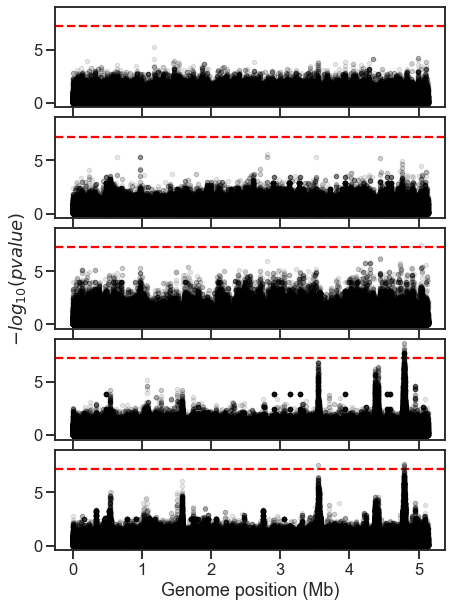

In [7]:
for reference in references:
    print(reference)

    fig, axs = plt.subplots(len(phenotypes), 1, figsize=(7, 2 * len(phenotypes)),
                        constrained_layout=False,
                        sharex=True, sharey=True)
    
    for i, (phenotype, ax) in enumerate(zip(phenotypes, axs.flat)):
        u = pd.read_csv(f'../out/B2/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
        m = pd.read_csv(f'../out/B2/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
        m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
        a = u.join(m, how='inner')

        ax.plot(a['pos'], -np.log10(a['lrt-pvalue']), 'k.', alpha=0.1, rasterized=True)

        ax.axhline(-np.log10(threshold), color='r', ls='dashed', zorder=-1)

        # ax.set_title(phenotype)
        if i == 2:
            ax.set_ylabel('$-log_{10}(pvalue)$')

    ax.set_xlabel('Genome position (Mb)')
    fig.subplots_adjust(wspace=0, hspace=0.1)

    plt.savefig(f'manhattan_B2_{reference}.png',
                dpi=300,
                bbox_inches='tight',
                transparent=True)
    plt.savefig(f'manhattan_B2_{reference}.svg',
                dpi=300, bbox_inches='tight',
                transparent=True)

In [8]:
pg = pd.read_csv('../out/panaroo_ref/gene_presence_absence_roary.csv',
                 sep=',', low_memory=False,
                 index_col=0)
pg.drop(list(pg.columns[:13]), axis=1, inplace=True)

In [9]:
phenotype = 'passage_en_rea'
reference = 'IAI39'

u = pd.read_csv(f'../out/B2/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/B2/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

genes = set()
for gene in set(a[a['lrt-pvalue'] <= threshold].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten()):
    if str(gene) == 'nan':
        continue
    for idx, row in pg[['IAI39']].dropna().iterrows():
        if gene in row['IAI39']:
            genes.add(idx)
            break

genes

{'opgB'}

In [10]:
a['round'] = [round(x, 3) for x in a['pos']]

In [11]:
sorted(set(a[a['lrt-pvalue'] <= threshold]['round'].values))

[5.04]

In [12]:
genes = set(a[a['lrt-pvalue'] <= threshold].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten())

In [13]:
parse_gff('../data/references/IAI39/IAI39.gff', 5, 5.1, genes)

opgB	ECIAI39_RS24215


In [14]:
phenotype = 'passage_en_rea'
reference = 'IAI39'

u = pd.read_csv(f'../out/B2/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/B2/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

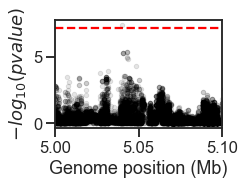

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2),
                       constrained_layout=False,
                       sharey=True)

ax.plot(a['pos'], -np.log10(a['lrt-pvalue']), 'k.', alpha=0.1, rasterized=True)

ax.axhline(-np.log10(threshold), color='r', ls='dashed', zorder=-1)

ax.set_ylabel('$-log_{10}(pvalue)$')

ax.set_xlabel('Genome position (Mb)')

ax.set_xlim(5, 5.1)

plt.savefig(f'zoom_B2_{reference}_{phenotype}.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig(f'zoom_B2_{reference}_{phenotype}.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [16]:
phenotype = 'pe_urinaire'
reference = 'IAI39'

u = pd.read_csv(f'../out/B2/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/B2/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

genes = set()
for gene in set(a[a['lrt-pvalue'] <= threshold].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten()):
    if str(gene) == 'nan':
        continue
    for idx, row in pg[['IAI39']].dropna().iterrows():
        if gene in row['IAI39']:
            genes.add(idx)
            break

genes

{'group_3241', 'group_3379', 'group_3837', 'group_3965'}

In [17]:
a['round'] = [round(x, 3) for x in a['pos']]

In [18]:
sorted(set(a[a['lrt-pvalue'] <= threshold]['round'].values))

[4.787, 4.791, 4.793, 4.794]

In [19]:
genes = set(a[a['lrt-pvalue'] <= threshold].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten())

In [21]:
parse_gff('../data/references/IAI39/IAI39.gff', 4.786, 4.802, genes)

papH	ECIAI39_RS22990
	ECIAI39_RS23010
papF	ECIAI39_RS23020
papG-II	ECIAI39_RS23025


In [22]:
phenotype = 'pe_urinaire'
reference = 'IAI39'

u = pd.read_csv(f'../out/B2/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/B2/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

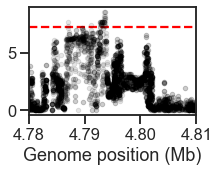

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2),
                       constrained_layout=False,
                       sharey=True)

ax.plot(a['pos'], -np.log10(a['lrt-pvalue']), 'k.', alpha=0.1, rasterized=True)

ax.axhline(-np.log10(threshold), color='r', ls='dashed', zorder=-1)

ax.set_xlabel('Genome position (Mb)')

ax.set_xlim(4.78, 4.81)

plt.savefig(f'zoom_B2_{reference}_{phenotype}.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig(f'zoom_B2_{reference}_{phenotype}.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [24]:
phenotype = 'pe_digestive'
reference = 'IAI39'

u = pd.read_csv(f'../out/B2/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/B2/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

genes = set()
for gene in set(a[a['lrt-pvalue'] <= threshold].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten()):
    if str(gene) == 'nan':
        continue
    for idx, row in pg[['IAI39']].dropna().iterrows():
        if gene in row['IAI39']:
            genes.add(idx)
            break

genes

{'group_3240', 'group_3241', 'group_3379', 'papF'}

In [26]:
a['round'] = [round(x, 3) for x in a['pos']]

In [27]:
sorted(set(a[a['lrt-pvalue'] <= threshold]['round'].values))

[3.553, 4.79, 4.792, 4.793, 4.794]

In [28]:
genes = set(a[a['lrt-pvalue'] <= threshold].sort_values('lrt-pvalue')[[6, 7, 8]].values.flatten())

In [29]:
parse_gff('../data/references/IAI39/IAI39.gff', 3.55, 3.56, genes)

papF	ECIAI39_RS17135


In [30]:
parse_gff('../data/references/IAI39/IAI39.gff', 4.78, 4.8, genes)

	ECIAI39_RS23000
papF	ECIAI39_RS23020
papG-II	ECIAI39_RS23025


In [31]:
phenotype = 'pe_digestive'
reference = 'IAI39'

u = pd.read_csv(f'../out/B2/{phenotype}/unitigs.tsv', sep='\t', index_col=0, low_memory=False)
m = pd.read_csv(f'../out/B2/{phenotype}/mapped_reference/{reference}.txt', sep='\t', header=None, index_col=1)
m['pos'] = ((m[3] + m[4]) / 2) / 1_000_000
a = u.join(m, how='inner')

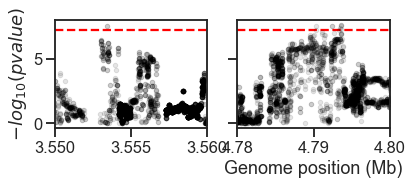

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2),
                        constrained_layout=False,
                        sharey=True)

ax = axs.flat[0]
ax.plot(a['pos'], -np.log10(a['lrt-pvalue']), 'k.', alpha=0.1, rasterized=True)

ax.axhline(-np.log10(threshold), color='r', ls='dashed', zorder=-1)

ax.set_ylabel('$-log_{10}(pvalue)$')

ax.set_xlim(3.55, 3.56)

ax = axs.flat[1]
ax.plot(a['pos'], -np.log10(a['lrt-pvalue']), 'k.', alpha=0.1, rasterized=True)

ax.axhline(-np.log10(threshold), color='r', ls='dashed', zorder=-1)

ax.set_xlabel('Genome position (Mb)')

ax.set_xlim(4.78, 4.8)

plt.savefig(f'zoom_B2_{reference}_{phenotype}.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig(f'zoom_B2_{reference}_{phenotype}.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);